In [1]:
from turtle import color
import pyodbc
import pandas as pd
import pandas.io.sql
import matplotlib.pyplot as plt
import plotly.express as px

db = pyodbc.connect(driver='{ODBC Driver 17 for SQL Server}',
                    server='LAPTOP-S945UORA',       # Nigel's PC number, insert your own 
                    database='AdventureWorks2019',
                    Trusted_Connection='yes')       # Don't require user/pass, just trust

### 1.	What is the regional sales in best performing country

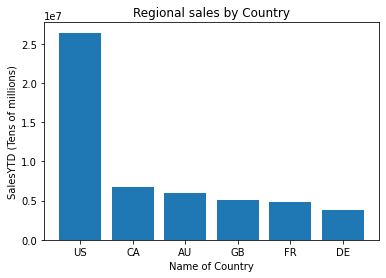

In [3]:
query1a = "SELECT CountryRegionCode, sum(SalesYTD) as SalesYTD  , sum(SalesLastYear) as SalesLastYear from Sales.SalesTerritory group by CountryRegionCode order by SalesYTD desc;"
df1a = pd.io.sql.read_sql(query1a, db)
df1a = df1a.sort_values(by=["SalesYTD"], ascending=False)
#print(df1a)
plt.bar(df1a["CountryRegionCode"],df1a["SalesYTD"])
plt.xlabel("Name of Country")
plt.ylabel("SalesYTD (Tens of millions)")
plt.title("Regional sales by Country")
plt.show()

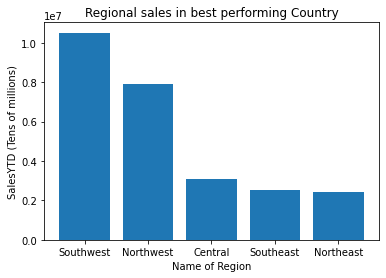

In [4]:
query1b = "SELECT Name, CountryRegionCode, SalesYTD from Sales.SalesTerritory where CountryRegionCode ='US';"
df1b= pd.io.sql.read_sql(query1b, db)
df1b = df1b.sort_values(by=["SalesYTD"], ascending=False)
#print(df1b)
plt.bar(df1b["Name"],df1b["SalesYTD"])
plt.xlabel("Name of Region")
plt.ylabel("SalesYTD (Tens of millions)")
plt.title("Regional sales in best performing Country")
plt.show()

### 2.	What is the relationship between annual leave taken and bonus

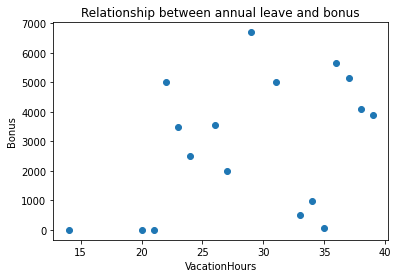

In [2]:
query2 = "SELECT E.VacationHours, SP.Bonus FROM HumanResources.Employee AS E inner join Sales.SalesPerson AS SP ON E.BusinessEntityID = SP.BusinessEntityID ORDER BY SP.Bonus;"
df2= pd.io.sql.read_sql(query2, db)
df2= df2.sort_values(by=["VacationHours"])
#print(df2)
plt.scatter(x=df2["VacationHours"],y=df2["Bonus"])
plt.xlabel("VacationHours")
plt.ylabel("Bonus")
plt.title("Relationship between annual leave and bonus")
plt.show()

### 3.	What is the relationship between Country and Revenue

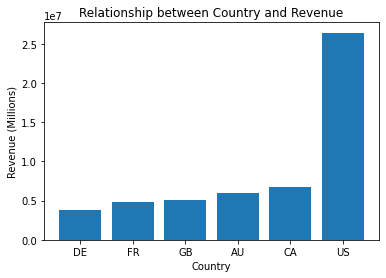

In [6]:
query3 = "SELECT CountryRegionCode, sum(SalesYTD) as SalesYTD  , sum(CostYTD) as Cost, sum(SalesYTD - CostYTD) as Revenue  from Sales.SalesTerritory group by CountryRegionCode order by SalesYTD desc;"
df3= pandas.io.sql.read_sql(query3, db)
df3= df3.sort_values(by=["Revenue"])
#print(df3)
plt.bar(df3["CountryRegionCode"],df3["Revenue"])
plt.xlabel("Country")
plt.ylabel("Revenue (Millions)")
plt.title("Relationship between Country and Revenue")
plt.show()

### 4.	What is the relationship between sick leave and Job Title (PersonType)

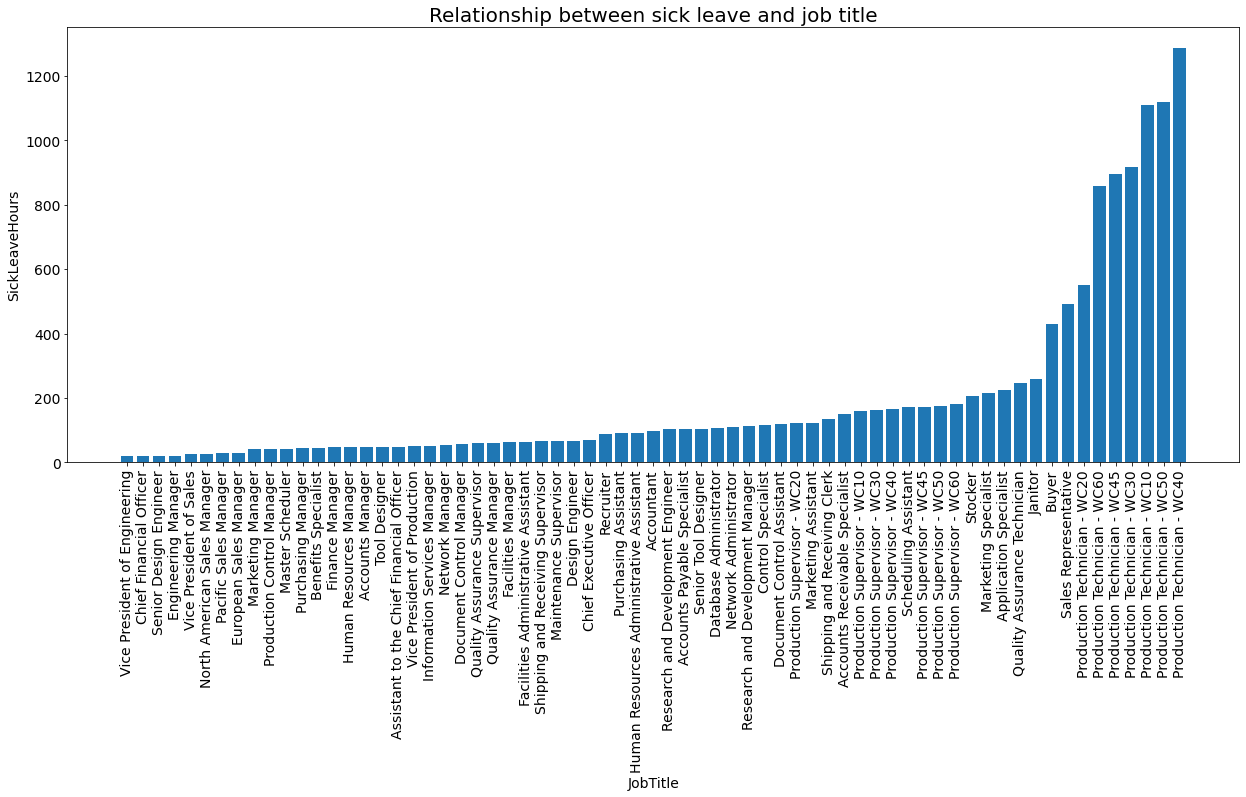

In [46]:
query4a = "SELECT E.SickLeaveHours, E.JobTitle, E.Gender FROM HumanResources.Employee AS E ORDER BY E.JobTitle;"
df4a= pandas.io.sql.read_sql(query4a, db)
df4a= df4a.pivot_table(index=["JobTitle"], values=["SickLeaveHours"], aggfunc="sum")
df4a= df4a.sort_values(by=["SickLeaveHours"])
#print(df4a)
plt.figure(figsize=(21,8))

plt.rc('font', size=14)
plt.rc('axes', titlesize=20)

plt.bar(df4a.index,df4a["SickLeaveHours"])
plt.xticks(rotation=90) # Rotate the Job Titles so they don't overlap

plt.xlabel("JobTitle")
plt.ylabel("SickLeaveHours")
plt.title("Relationship between sick leave and job title")
plt.show()

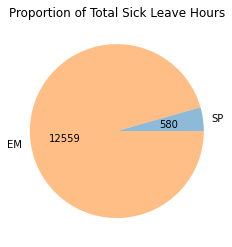

In [22]:
query4b = "SELECT E.SickLeaveHours, E.JobTitle, P.PersonType FROM HumanResources.Employee AS E JOIN Person.Person as P ON E.BusinessEntityID = P.BusinessEntityID ORDER BY E.JobTitle;"
df4b = pandas.io.sql.read_sql(query4b, db)
df4b= df4b.pivot_table(index=["PersonType"], values=["SickLeaveHours"], aggfunc="sum")
df4b= df4b.sort_values(by=["SickLeaveHours"])
#print(df4b)
#plt.pie(df4b["SickLeaveHours"],labels=df4b.index,autopct='%1.1f%%')     Pourcentage
values=df4b["SickLeaveHours"]
plt.figure(facecolor='white')
plt.pie(df4b["SickLeaveHours"],labels=df4b.index,autopct= lambda x: '{:.0f}'.format(x*values.sum()/100),wedgeprops={'alpha':0.5})  #Values instead of %
plt.title("Proportion of Total Sick Leave Hours")
plt.show()

### 5.	What is the relationship between store trading duration and revenue

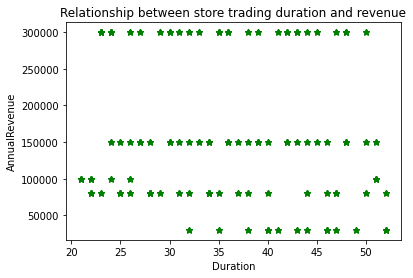

In [23]:
query5 = "SELECT [Name] , [YearOpened]  , [AnnualRevenue] FROM [AdventureWorks2019].[Sales].[vStoreWithDemographics] ORDER BY [Name]"
df5= pandas.io.sql.read_sql(query5, db)
PresentYear = 2022
df5["Duration"] = PresentYear-df5["YearOpened"]
df5 = df5.sort_values(by=["Duration"])
#print(df5)
plt.scatter(df5["Duration"],df5["AnnualRevenue"],color='g', marker='*')
plt.xlabel("Duration")
plt.ylabel("AnnualRevenue")
plt.title("Relationship between store trading duration and revenue")
plt.show()  

### 6.	What is the relationship between the size of the stores, number of employees and revenue

In [28]:
query6 = "SELECT [Name],[AnnualRevenue],[SquareFeet],[NumberEmployees] FROM [AdventureWorks2019].[Sales].[vStoreWithDemographics] ORDER BY [Name]"
df6= pandas.io.sql.read_sql(query6, db)         # For This One we use a Bubble Chart , I coded 2 options
#print(df6)
#plt.scatter(x=df6["AnnualRevenue"],y=df6["SquareFeet"],s=df6["NumberEmployees"],alpha=0.05)
#plt.xlabel("AnnualRevenue")
#plt.ylabel("SquareFeet")
#plt.show()
# Other Option using another library 
fig = px.scatter(df6, x="AnnualRevenue",y="SquareFeet",size='NumberEmployees',title="Relationship between store,revenue and employees")
fig.show()